# Reference


<img src="https://bimage.interpark.com/partner/goods_image/5/1/9/3/328045193g.jpg" width="200px"></img> <img src="https://bimage.interpark.com/partner/goods_image/4/9/7/7/332334977g.jpg" width="200px"></img> 

# 회귀 Regression

## 목차

- 회귀 Regressor 소개
- 선형 회귀 Linear Regression 실습

# 분류와 회귀

## 강아지와 고양이 구분

강아지와 고양이의 중간은 없다.

<img src="https://upload.wikimedia.org/wikipedia/en/6/64/CatDog.jpeg" width="500px">

## 부동산 가격 예측

부동산 가격은 연속적인 실수(Real number)로 나타낼 수 있다.
- 1000만원
- 1001만원
- 1억 2500만원
- 51억 4123만원

<img src="https://i.imgur.com/CVn37J0.png" width="500px">

## 분류, 회귀 둘 다 가능한 문제가 있을까?

<img src="https://i.imgur.com/ScqDm6i.png" width="300px">

# 선형 회귀 실습

## 보스턴 집 값 데이터셋을 이용한 실습

### 데이터셋 로드

- CRIM: 범죄율
- ZN: 25,000평방 피트 당 주거용 토지의 비율
- INDUS: 비소매 비즈니스 면적 비율
- CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
- NOX: 산화 질소 농도 (1000만 분의 1)
- RM: 평균 방의 개수
- AGE: 1940년 이전에 건축된 자가 소유 점유 비율
- DIS: 5개의 보스턴 고용 센터까지의 가중 거리
- RAD: 고속도로 접근성 지수
- TAX: 10,000달러 당 전체 가치 재산 세율
- PTRATIO 도시별 학생-교사 비율
- B: 1000 (Bk-0.63) ^ 2 (Bk는 도시별 검정 비율)
- LSTAT: 인구의 낮은 지위
- target: 자가 주택의 중앙값 (1,000달러 단위)

In [6]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df[100:105]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
100,0.14866,0.0,8.56,0.0,0.52,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
101,0.11432,0.0,8.56,0.0,0.52,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5
102,0.22876,0.0,8.56,0.0,0.52,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
103,0.21161,0.0,8.56,0.0,0.52,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44,19.3
104,0.13960,0.0,8.56,0.0,0.52,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,20.1


### 데이터 시각화

Distribution plot

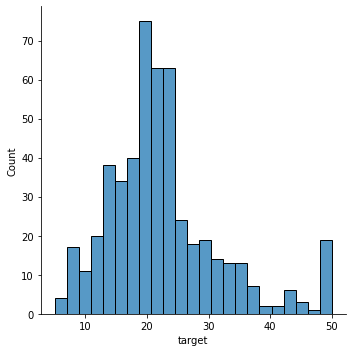

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x=df['target'])
plt.show()

Correlation matrix

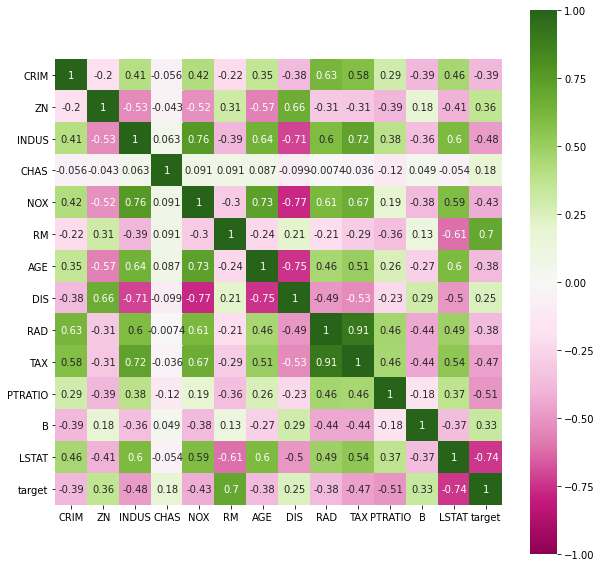

In [ ]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True, cmap='PiYG', vmin=-1, vmax=1)
plt.show()

### 데이터셋 분할

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(404, 13) (404,)
(102, 13) (102,)


### 모델 정의

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### 학습

In [10]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 검증

In [11]:
x_val[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
210,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30
36,0.09744,0.0,5.96,0.0,0.499,5.841,61.4,3.3779,5.0,279.0,19.2,377.56,11.41
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73


In [12]:
y_pred = model.predict(x_val)

print(y_pred[:5])

[22.99953402 15.706379   22.29592989 13.34992498 37.11777273]


### 회귀에서의 정확도는 어떻게 구할 수 있을까?

- 정답값과 예측값이 차이가 작으면 정확도가 높다
- 정답값과 예측값의 차이가 크면 정확도가 낮다

In [13]:
print(list(y_val[:5]))

print(list(y_pred[:5]))

[21.7, 15.6, 20.0, 12.8, 50.0]
[22.99953401869189, 15.70637899751403, 22.295929891538012, 13.349924978813917, 37.11777273422223]


In [14]:
y_val[:5] - y_pred[:5]

210    -1.299534
24     -0.106379
36     -2.295930
439    -0.549925
161    12.882227
Name: target, dtype: float64

In [15]:
abs(y_val[:5] - y_pred[:5])

210     1.299534
24      0.106379
36      2.295930
439     0.549925
161    12.882227
Name: target, dtype: float64

### Mean Absolute Error

- MAE
- 정답과 예측값 차이의 절대값의 평균

In [16]:
abs(y_val[:5] - y_pred[:5]).mean()

3.4267990304671243

In [17]:
abs(y_val - y_pred).mean()

3.519048295034865

In [23]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_val, y_pred)

3.51904829503486

### Mean Squared Error

- MSE
- 정답과 예측값 차이의 제곱의 평균

In [18]:
((y_val - y_pred) ** 2).mean()

23.299928845559197

In [19]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_pred)

23.299928845559208

### 표준화

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

print(x_train_scaled[:5])

[[-0.34296653 -0.48638382 -0.44615862 -0.26226526 -0.16925611  0.30432993
   0.9060127   0.31932202 -0.66238669 -0.63017503  1.16128713  0.34775246
   0.01797839]
 [-0.400108   -0.48638382 -0.22492177 -0.26226526  0.22437432 -0.37198851
  -0.13597902 -0.63973246 -0.43675075 -0.14046539  0.33659182  0.44448944
   0.03466916]
 [-0.42473192  3.30215854 -1.18409055 -0.26226526 -1.32502205  1.14688631
  -1.72940278  1.65672856 -1.0008406  -0.75843232 -1.45024803  0.42095299
  -0.670516  ]
 [ 4.470621   -0.48638382  0.97546653 -0.26226526  1.12888679 -2.5032441
   1.10653345 -0.99178272  1.5939727   1.46275069  0.79475588 -2.88764591
   3.38116917]
 [-0.40960607 -0.48638382  2.05310407 -0.26226526  0.19087386 -0.60358495
   0.99911162 -0.85760136 -0.88802263 -1.32393035  0.29077541  0.15740951
   1.77190046]]


In [24]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_val_scaled)

mean_absolute_error(y_val, y_pred)

3.51904829503486

### 정규화

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

print(x_train_scaled[:5])

[[0.00858665 0.         0.28152493 0.         0.31481481 0.56816421
  0.9423275  0.30236703 0.13043478 0.22900763 0.89361702 0.97740683
  0.30180305]
 [0.0025859  0.         0.33834311 0.         0.41152263 0.47598761
  0.64263646 0.11635097 0.2173913  0.38931298 0.70212766 1.
  0.30513176]
 [0.         0.9        0.0920088  0.         0.0308642  0.68299768
  0.18434604 0.56176741 0.         0.1870229  0.28723404 0.994503
  0.16449376]
 [0.51408913 0.         0.64662757 0.         0.63374486 0.1855151
  1.         0.04806809 1.         0.91412214 0.80851064 0.22177114
  0.97253814]
 [0.00158845 0.         0.9233871  0.         0.40329218 0.44442293
  0.96910402 0.07409361 0.04347826 0.0019084  0.69148936 0.93295174
  0.65159501]]


In [29]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_val_scaled)

mean_squared_error(y_val, y_pred)

23.29992884555909

## Linear Regression (선형회귀)

<img src="https://i.imgur.com/ndoi0Fx.png" width="600px">

## Ridge Regression 맛보기

학습이 과대적합 되는 것을 방지하기위해 패널티를 부여합니다. (L2 Regularazation)

용어를 몰라도 문서를 보고 다른 알고리즘을 사용하는 방법을 익혀보죠.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [30]:
from sklearn.linear_model import Ridge

model = Ridge()

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

mean_absolute_error(y_val, y_pred)

3.493837022979013

## 당뇨병 데이터셋을 이용한 실습

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

### 데이터셋 로드

- age: 나이
- sex: 성별
- bmi: BMI 체질량지수
- bp: 평균 혈압
- s1 tc: 총 혈청 콜레스테롤
- s2 ldl: 저밀도 지방단백질
- s3 hdl: 고밀도 지방단백질
- s4 tch: 총 콜레스테롤 / HDL
- s5 ltg: 혈청 트리글리세리드 수치의 로그
- s6 glu: 혈당 수치
- target: 1년 후 당뇨병 진행도

In [31]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [33]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### 데이터 시각화

이미 표준화가 되어 있는 데이터셋

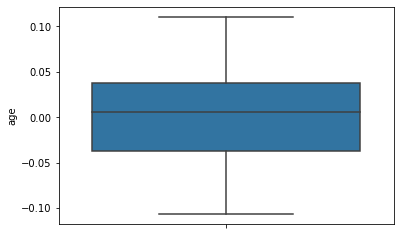

In [34]:
sns.boxplot(y=df['age'])

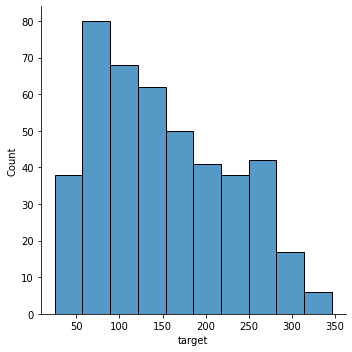

In [35]:
sns.displot(x=df['target'])
plt.show()

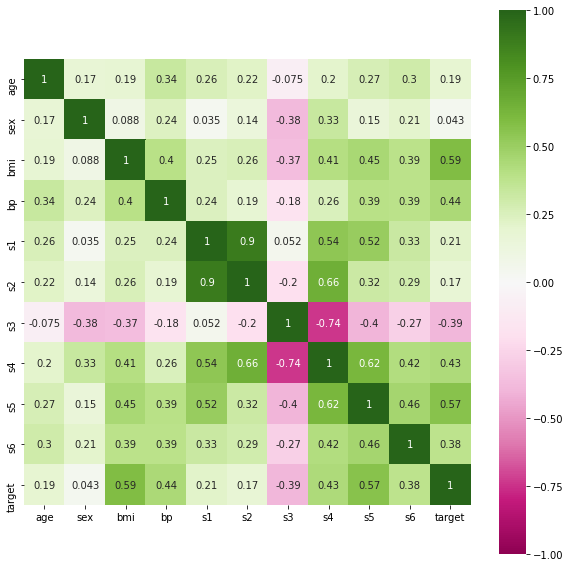

In [ ]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True, cmap='PiYG', vmin=-1, vmax=1)
plt.show()

### 데이터셋 분할

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(353, 10) (353,)
(89, 10) (89,)


### 모델 정의, 학습, 검증

In [37]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

mean_absolute_error(y_val, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


47.780616263657926

In [38]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

mean_absolute_error(y_val, y_pred)

41.229162625630586

### 검증 결과 시각화

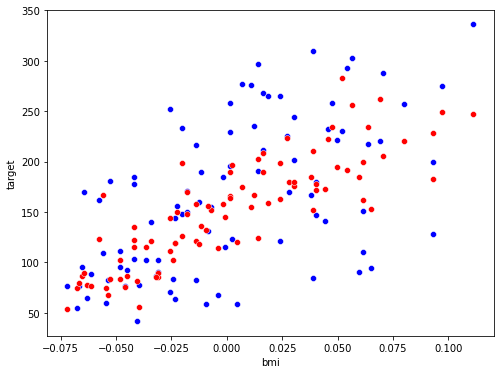

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_val['bmi'], y=y_val, color='b')
sns.scatterplot(x=x_val['bmi'], y=y_pred, color='r')
plt.show()